# Task Description
The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

Reference : https://www.kaggle.com/datasets/arshid/iris-flower-dataset

### Import Libraries

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Data Gathering

In [25]:
df = pd.read_csv('/Users/Renu/Documents/CodSoft/task_3/IRIS.csv.xls')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Data Exploration

In [26]:
df.shape

(150, 5)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object')]

In [30]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [31]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [32]:
print("unique number of species in iris dataset is : ",df["species"].nunique())

unique number of species in iris dataset is :  3


In [33]:
print("unique species in iris dataset are : ",df["species"].unique())

unique species in iris dataset are :  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [34]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

>No Null values detected

### Exploratory Data Analysis

#### Data Visualization

<AxesSubplot:xlabel='species', ylabel='count'>

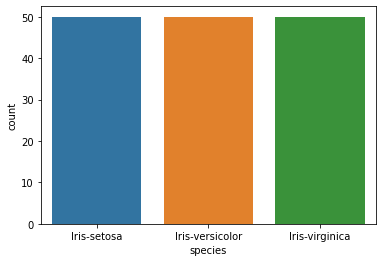

In [35]:
sns.countplot(x=df["species"])

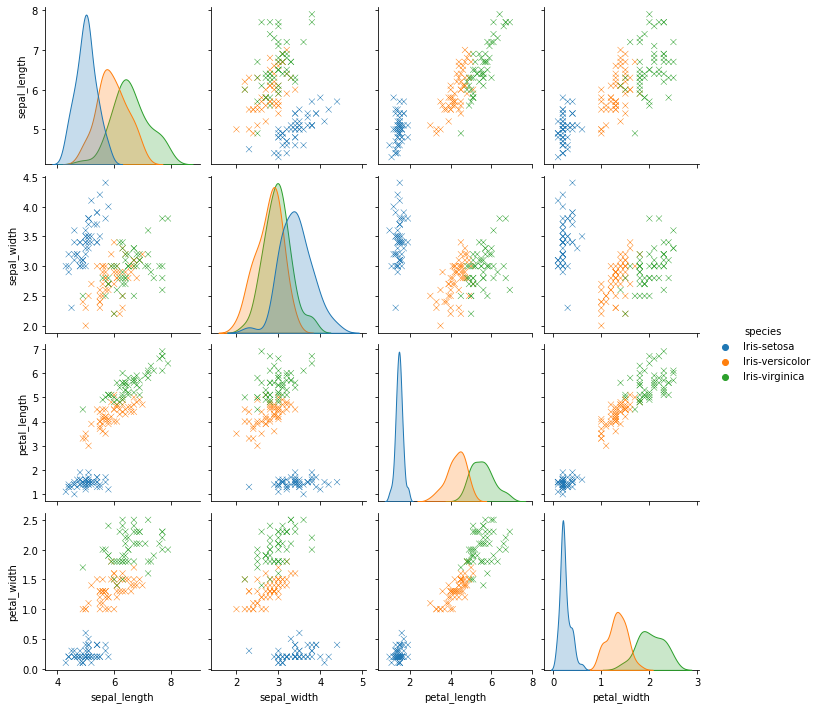

In [36]:
sns.pairplot(df,hue='species',markers='x')
plt.show()

>This shows that Iris-setosa is separated from Iris-versicolor and Iris-virginica

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:>

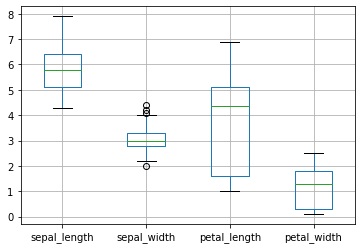

In [38]:
df.boxplot()

<AxesSubplot:>

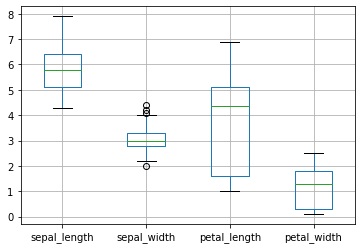

In [39]:
df.boxplot()

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

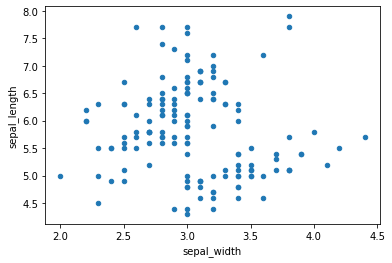

In [40]:
df.plot(x = 'sepal_width',y = 'sepal_length', kind = 'scatter')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

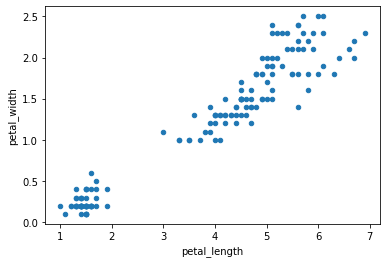

In [41]:
df.plot(x = 'petal_length',y = 'petal_width', kind = 'scatter')

In [42]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [43]:
df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}, inplace = True)

<AxesSubplot:>

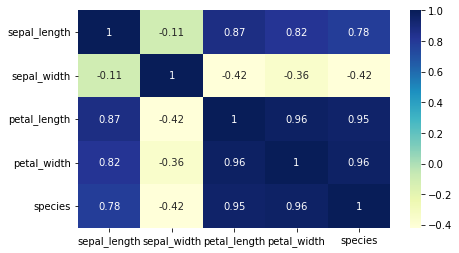

In [44]:
plt.figure(figsize = (7,4))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

### Splitting Dataset 

In [45]:
x=df.drop("species",axis=1)
y=df["species"]

In [46]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

### Model Training/Building

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3,stratify=y)

In [49]:
print('Shape of x_train is : ', x_train.shape)
print('Shape of x_test is : ',  x_test.shape)
print('Shape of y_train is : ', y_train.shape)
print('Shape of y_test is : ',  y_test.shape)

Shape of x_train is :  (105, 4)
Shape of x_test is :  (45, 4)
Shape of y_train is :  (105,)
Shape of y_test is :  (45,)


### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()
model

LogisticRegression()

In [52]:
model.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred=model.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
y_pred=model.predict(x_test)
y_pred

array([0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       1])

In [56]:
y_test[5:10]

135    2
8      0
68     1
134    2
86     1
Name: species, dtype: int64

In [57]:
y_pred[5:10]

array([2, 0, 1, 2, 1])

In [58]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]])

In [59]:
clf_report=classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [60]:
# Traing Data Evaluation
y_pred_train=model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred_train)
print(cnf_matrix)
print()
print()

acc_score=accuracy_score(y_train,y_pred_train)
print('Accuracy Score is : ',acc_score)
print()
print() 


clf_report=classification_report(y_train,y_pred_train)
print(clf_report)

[[35  0  0]
 [ 0 34  1]
 [ 0  1 34]]


Accuracy Score is :  0.9809523809523809


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.97      0.97        35
           2       0.97      0.97      0.97        35

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [61]:
# Testing Data Evaluation
y_pred=model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print(cnf_matrix)
print()
print()

acc_score=accuracy_score(y_test,y_pred)
print('Accuracy Score is : ',acc_score)
print()
print() 

clf_report=classification_report(y_test,y_pred)
print(clf_report)

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]


Accuracy Score is :  0.9333333333333333


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [62]:
def get_predicted_class(x1,x2,x3,x4):
    
    predicted_class=model.predict([[x1,x2,x3,x4]])
    
    return predicted_class


sepal_length=int(input('Enter the value of SepalLengthCm : '))
sepal_width=int(input('Enter the value of SepalWidthCm : '))
petal_length=int(input('Enter the value of PetalLengthCm : '))
petal_width=int(input('Enter the value of PetalWidthCm : '))


get_predicted_class(sepal_length,sepal_width,petal_length,petal_width)

array([0])

In [63]:
model.score(x,y)

0.9666666666666667

In [64]:
acc_score

0.9333333333333333